# Lisette

> Lisette makes LiteLLM easier to use

In [ ]:
#| hide
from cachy import enable_cachy
from lisette import patch_litellm

In [ ]:
#| hide
enable_cachy()
patch_litellm()

> **NB**: If you are reading this in GitHub's readme, we recommend you instead read the much more nicely formatted [documentation format](https://lisette.answer.ai/) of this tutorial.

_Lisette_ is a wrapper for the [LiteLLM Python SDK](https://docs.litellm.ai/), which provides unified access to 100+ LLM providers using the OpenAI API format.

LiteLLM provides a unified interface to access multiple LLMs, but it's quite low level: it leaves the developer to do a lot of stuff manually. Lisette automates pretty much everything that can be automated, whilst providing full control. Amongst the features provided:

* A `Chat` class that creates stateful dialogs across any LiteLLM-supported model
* Convenient message creation utilities for text, images, and mixed content
* Simple and convenient support for tool calling with automatic execution
* Built-in support for web search capabilities (including citations for supporting models)
* Streaming responses with formatting
* Full async support with `AsyncChat`
* Prompt caching (for supporting models)

To use Lisette, you'll need to set the appropriate API keys as environment variables for whichever LLM providers you want to use.

## Get started

LiteLLM will automatically be installed with Lisette, if you don't already have it.

In [ ]:
!pip install lisette -qq

Lisette only exports the symbols that are needed to use the library, so you can use import * to import them. Here's a quick example showing how easy it is to switch between different LLM providers:

In [ ]:
from lisette import *

## Chat

In [ ]:
models = ['claude-sonnet-4-20250514', 'gemini/gemini-2.5-flash', 'openai/gpt-4o']

for model in models:
    chat = Chat(model)
    res = chat("Please tell me about yourself in one brief sentence.")
    display(res)

I'm Claude, an AI assistant created by Anthropic to be helpful, harmless, and honest in conversations and tasks.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=29, prompt_tokens=17, total_tokens=46, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

I am a large language model, trained by Google to assist with information and generate text.

<details>

- id: `chatcmpl-xxx`
- model: `gemini-2.5-flash`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=988, prompt_tokens=11, total_tokens=999, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=970, rejected_prediction_tokens=None, text_tokens=18, image_tokens=None), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=None, text_tokens=11, image_tokens=None))`

</details>

I'm an AI language model created by OpenAI, designed to assist with a wide range of questions and tasks by providing information and generating text-based responses.

<details>

- id: `chatcmpl-xxx`
- model: `gpt-4o-2024-08-06`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=30, prompt_tokens=17, total_tokens=47, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0, text_tokens=None, image_tokens=None), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=0, cached_tokens=0, text_tokens=None, image_tokens=None))`

</details>

That's it! Lisette handles all the provider-specific details automatically. Each model will respond in its own style, but the interface remains the same.

## Message formatting

### Multiple messages

Lisette accepts multiple messages in one go:

In [ ]:
chat = Chat(models[0])
res = chat(['Hi! My favorite drink coffee.', 'Hello!', 'Whats my favorite drink?'])
display(res)

Hello! Based on what you just told me, your favorite drink is coffee! ☕

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=22, prompt_tokens=23, total_tokens=45, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

If you have a pre-existing message history, you can also pass it when you create the `Chat` object:

In [ ]:
chat = Chat(models[0],hist=['Hi! My favorite drink is coffee.', 'Hello!'])
res = chat('Whats my favorite drink?')
display(res)

Your favorite drink is coffee! You just mentioned that in your previous message.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=18, prompt_tokens=30, total_tokens=48, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

### Images

Lisette also makes it easy to include images in your prompts:

In [ ]:
from pathlib import Path
from IPython.display import Image

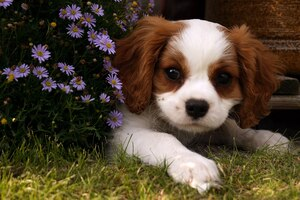

In [ ]:
fn = Path('samples/puppy.jpg')
img = fn.read_bytes()
Image(img)

All you have to do is read it in as bytes:

In [ ]:
img[:20]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00'

And you can pass it inside a `Chat` object:

In [ ]:
chat = Chat(models[0])
chat([img, "What's in this image? Be brief."])

A cute puppy with brown and white fur lying on grass next to purple flowers.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=20, prompt_tokens=108, total_tokens=128, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

### Prefill
Some providers (e.g. Anthropic) support `prefill`, allowing you to specify how the assistant's response should begin:"



In [ ]:
chat = Chat(models[0])
chat("Concisely, what's the meaning of life?", prefill="According to Douglas Adams,")

According to Douglas Adams,it's 42. But seriously, there's no universal answer—it's deeply personal. Some find meaning through relationships, others through purpose, growth, service, creativity, or spiritual connection. The meaning might be less about finding a predetermined answer and more about creating significance through how you choose to live.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=64, prompt_tokens=24, total_tokens=88, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

## Tools

Lisette makes it easy to give LLMs access to Python functions. Just define a function with type hints and a docstring:

In [ ]:
def add_numbers(
    a: int,  # First number to add
    b: int   # Second number to add  
) -> int:
    "Add two numbers together"
    return a + b

Now pass the function to `Chat` and the model can use it automatically:

In [ ]:
chat = Chat(models[0], tools=[add_numbers])
res = chat("What's 47 + 23? Use the tool.")
res

I successfully completed the calculation using the add_numbers tool. The result of 47 + 23 is **70**.

The goal was fully accomplished - I used the requested tool to perform the addition and provided you with the correct answer.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=53, prompt_tokens=578, total_tokens=631, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

If you want to see all intermediate messages and outputs you can use the `return_all=True` feature.

In [ ]:
chat = Chat(models[0], tools=[add_numbers])
res = chat("What's 47 + 23 + 59? Use the tool.",max_steps=3,return_all=True)
display(*res)

I'll help you calculate 47 + 23 + 59 using the add_numbers tool. Since the tool can only add two numbers at a time, I'll need to do this in two steps.

🔧 add_numbers({"a": 47, "b": 23})


<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `tool_calls`
- usage: `Usage(completion_tokens=116, prompt_tokens=433, total_tokens=549, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

{'tool_call_id': 'toolu_9yi0_kJITjqKXS80a6qUVQ',
 'role': 'tool',
 'name': 'add_numbers',
 'content': '70'}

Now I'll add the result (70) to the third number (59):

🔧 add_numbers({"a": 70, "b": 59})


<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `tool_calls`
- usage: `Usage(completion_tokens=87, prompt_tokens=562, total_tokens=649, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

{'tool_call_id': 'toolu_6xFns2epQ3i8ZcHlguLmYg',
 'role': 'tool',
 'name': 'add_numbers',
 'content': '129'}

I successfully completed the calculation using the add_numbers tool. Here's a summary of my findings:

**Calculation: 47 + 23 + 59**

Step 1: 47 + 23 = 70
Step 2: 70 + 59 = 129

**Final Answer: 129**

The goal was fully completed. I was able to calculate the sum of all three numbers (47 + 23 + 59) by breaking it down into two addition operations, since the tool only accepts two numbers at a time. The final result is 129.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=133, prompt_tokens=707, total_tokens=840, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

It shows the intermediate tool calls, and the tool results!

## Web search

Some models support web search capabilities. Lisette makes this easy to use:

In [ ]:
chat = Chat(models[0], search='l')  # 'l'ow, 'm'edium, or 'h'igh search context
res = chat("Please tell me one fun fact about otters. Keep it brief")
res

Here's a fun fact about otters: When otters sleep, they wrap themselves in seaweed and float together in a group called a raft! This adorable behavior helps prevent them from drifting apart while they rest on the water's surface.

🔧 web_search({"query": "fun facts about otters"})


<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=134, prompt_tokens=17286, total_tokens=17420, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), server_tool_use=ServerToolUse(web_search_requests=1, tool_search_requests=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

::: {.callout-tip}
Some providers (like Anthropic) provide citations for their search results.
:::

In [ ]:
res.choices[0].message.provider_specific_fields

{'citations': [[{'type': 'web_search_result_location',
    'cited_text': 'Otters like to stick together, so when they sleep they will wrap themselves in seaweed and float together in a group. A group of resting otters is cal...',
    'url': 'https://www.jojomamanbebe.co.uk/little-extras/news/10-fun-facts-otters',
    'title': '10 Fun Facts About Otters | JoJo Maman Bébé',
    'encrypted_index': 'EpQBCioICxgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDEDs30SRof4onaon3BoM5bBVeN1I0R5vexYBIjA1mgSvc73Q1I4oMv934tkuLTurC2MzKfljsNU2erHHFtGRiCK24s+uvZ95InT8EgkqGCvAcDLISvMwBhSLdYlR4Imj95gA77H+FRgE',
    'supported_text': 'When otters sleep, they wrap themselves in seaweed and float together in a group called a raft'}]],
 'thinking_blocks': None,
 'web_search_results': [{'type': 'web_search_tool_result',
   'tool_use_id': 'srvtoolu_015FHgeZ1fxufmcFFMzz22Cb',
   'content': [{'type': 'web_search_result',
     'title': '12 Facts About Otters for Sea Otter Awareness Week | U.S. Department of

## Streaming

For real-time responses, use `stream=True` to get chunks as they're generated rather than waiting for the complete response:

In [ ]:
chat = Chat(models[0])
res_gen = chat("Concisely, what are the top 10 biggest animals?", stream=True)

In [ ]:
from litellm import ModelResponse, ModelResponseStream

You can loop over the generator to get the partial responses:

In [ ]:
for chunk in res_gen:
    if isinstance(chunk,ModelResponseStream): print(chunk.choices[0].delta.content,end='')

Here are the top 10 biggest animals by size/weight:

1. **Blue whale** - largest animal ever, up to 100 feet long
2. **Fin whale** - second-largest whale, up to 85 feet
3. **Bowhead whale** - up to 65 feet, very heavy build
4. **Right whale** - up to 60 feet, extremely bulky
5. **Sperm whale** - up to 67 feet, largest toothed whale
6. **Gray whale** - up to 50 feet
7. **Humpback whale** - up to 52 feet
8. **African elephant** - largest land animal, up to 13 feet tall
9. **Colossal squid** - up to 46 feet long (largest invertebrate)
10. **Giraffe** - tallest animal, up to 18 feet tall

*Note: This list prioritizes overall mass/volume, with whales dominating due to their enormous size.*None

And the final chunk is the complete `ModelResponse`:

In [ ]:
chunk

Here are the top 10 biggest animals by size/weight:

1. **Blue whale** - largest animal ever, up to 100 feet long
2. **Fin whale** - second-largest whale, up to 85 feet
3. **Bowhead whale** - up to 65 feet, very heavy build
4. **Right whale** - up to 60 feet, extremely bulky
5. **Sperm whale** - up to 67 feet, largest toothed whale
6. **Gray whale** - up to 50 feet
7. **Humpback whale** - up to 52 feet
8. **African elephant** - largest land animal, up to 13 feet tall
9. **Colossal squid** - up to 46 feet long (largest invertebrate)
10. **Giraffe** - tallest animal, up to 18 feet tall

*Note: This list prioritizes overall mass/volume, with whales dominating due to their enormous size.*

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=236, prompt_tokens=22, total_tokens=258, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=0, rejected_prediction_tokens=None, text_tokens=None, image_tokens=None), prompt_tokens_details=None)`

</details>

## Async

For web applications and concurrent operations, like in [FastHTML](https://fastht.ml), we recommend using `AsyncChat`:

In [ ]:
chat = AsyncChat(models[0])
await chat("Hi there")

Hello! How are you doing today? Is there anything I can help you with?

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=20, prompt_tokens=9, total_tokens=29, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None, cache_creation_tokens=0, cache_creation_token_details=CacheCreationTokenDetails(ephemeral_5m_input_tokens=0, ephemeral_1h_input_tokens=0)), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

To wrap up, we'll show an example of async + streaming + toolcalling + search:

In [ ]:
chat = AsyncChat(models[0], search='l', tools=[add_numbers])
res = await chat("""\
Search the web for the avg weight, in kgs, of male African and Asian elephants. Then add the two.
Keep your replies ultra concise! Dont search the web more than once please.
""", max_steps=4, stream=True)
_=await adisplay_stream(res)  # this is a convenience function to make async streaming look great in notebooks!

Based on the search results, I can find the average weights for male elephants:

**Male African elephants:** [*](https://www.africa-safaris.com/How-Much-Does-An-Elephant-Weigh "How Much Does An Elephant Weigh") Males typically weigh more than females, with an average weight of 11,000 pounds (5,000 kilograms)

**Male Asian elephants:** [*](https://www.ifaw.org/international/journal/difference-african-asian-elephants "African Elephants vs. Asian Elephants | IFAW") Asian elephant males weigh on average about 3,600 kilograms (7,900 pounds)

<details class='tool-usage-details'>
<summary>add_numbers(a=5000, b=3600)</summary>

```json
{
  "id": "toolu_VIfOHq8ZQiqZuKcU5hpEHA",
  "call": {
    "function": "add_numbers",
    "arguments": {
      "a": "5000",
      "b": "3600"
    }
  },
  "result": "8600"
}
```

</details>

**Male African elephants:** [*](https://www.africa-safaris.com/How-Much-Does-An-Elephant-Weigh "How Much Does An Elephant Weigh") 5,000 kg
**Male Asian elephants:** [*](https://www.ifaw.org/international/journal/difference-african-asian-elephants "African Elephants vs. Asian Elephants | IFAW") 3,600 kg

**Total:** 8,600 kg

## Next steps

Ready to dive deeper?

- Check out the rest of the [documentation](https://lisette.answer.ai/core.html).
- Visit the [GitHub repository](https://github.com/answerdotai/lisette) to contribute or report issues.
- Join our [Discord community](https://discord.gg/y7cDEX7r)!